In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('./headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [4]:
#using python

In [5]:
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)
num=0
den=0
for i in range(n):
    num+=((X[i] - mean_x)*(Y[i] - mean_y))
    den+=(X[i] - mean_x)**2
slope=num/den
c=mean_y-(slope*mean_x)
print(slope,c)

0.26342933948939945 325.57342104944223


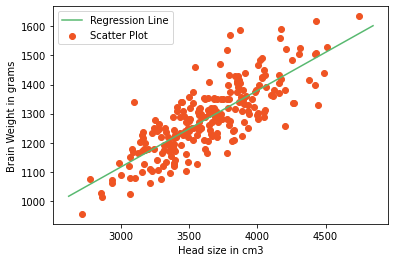

In [6]:
max_x=np.max(X)+100
min_x=np.min(X)-100

x=np.linspace(min_x,max_x,1000)
y=(slope*x)+c

plt.plot(x,y,color='#58b970',label='Regression Line')
plt.scatter(X,Y,color='#ef5423',label='Scatter Plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')

plt.legend()
plt.show()

In [7]:
# r squared value
ss_t=0
ss_r=0
for i in range(n):
    y_pred=slope*X[i]+c
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [8]:
#using scikit

In [9]:
# linear variable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
n=len(X)
X=X.reshape((n,1))
# creating model
reg=LinearRegression()
# fitting training data
reg=reg.fit(X,Y)
#coefficients/ slope of equation 
reg.coef_
reg.intercept_
# Y Prediction
Y_pred=reg.predict(X)
# calculate rmse and r2 score
mse=mean_squared_error(Y,Y_pred)
rmse=np.sqrt(mse)
r2_score=reg.score(X,Y)
print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


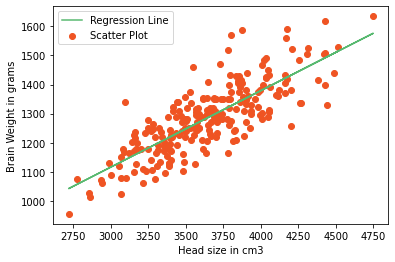

In [10]:
max_x=np.max(X)+100
min_x=np.min(X)-100

x=np.linspace(min_x,max_x,1000)

plt.plot(X,reg.predict(X),color='#58b970',label='Regression Line')
plt.scatter(X,Y,color='#ef5423',label='Scatter Plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')

plt.legend()
plt.show()

In [11]:
#multli variable
X=data[['Gender','Age Range','Head Size(cm^3)']]
Y=data['Brain Weight(grams)']

In [12]:
reg.fit(X,Y)
reg.coef_
reg.intercept_
# Y Prediction
Y_pred=reg.predict(X)
# calculate rmse and r2 score -----------metrics
mse=mean_squared_error(Y,Y_pred)
rmse=np.sqrt(mse)
r2_score=reg.score(X,Y)
print(np.sqrt(mse)) 
print(r2_score)


70.7557335304263
0.6528346387526653
